In [1]:
import numpy as np
import pandas as pd
import regex as re
import requests
import nltk
import matplotlib.pyplot as plt
import urllib
import geopandas as gpd

from collections import Counter
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from xmltodict import parse
from urllib.request import urlopen
from datetime import *
from zipfile import ZipFile
from mpl_toolkits.basemap import Basemap
from io import BytesIO

# Question 1

In [6]:
def Text(URL):
    with requests.get(URL) as url:
        raw = BeautifulSoup(url.content,'html.parser')
        text = raw.find('div', attrs = {'class':"row mb-4"}).text
    return text

In [7]:
text1 = Text('https://www.sozcu.com.tr/2022/teknoloji/james-webb-uzay-teleskobu-saturn-uydusu-titanda-bulutlar-tespit-etti-7514924/')
text1

"     Haberler - Bilim - Teknoloji   Abone Ol               James Webb Uzay Teleskobu, Satürn uydusu Titan’da bulutlar tespit etti ABD Havacılık ve Uzay Ajansının (NASA) James Webb Uzay Teleskobu, Satürn'ün en büyük uydusu Titan'da bulutlar tespit etti.     Sozcu.com.tr    Yayınlanma: 10:14 - 03 Aralık 2022  Güncellenme: 10:17 - 03 Aralık 2022                Yazıları büyüt Yazıları küçült Standart boyut         CNN’in haberine göre, James Webb Uzay Teleskobu, geçen ay Dünya'nın dört katı atmosfer yoğunluğuna sahip Titan’ı inceledi.İncelemede, 5 Kasım’da, Titan’ın kuzey yarımküresinde 2 bulut görüntülendi.Söz konusu bulutlardan büyüğü Titan’ın yüzeyindeki bilinen en büyük sıvı kütlesi Kraken Mare'nin yakınında tespit edildi.Titan'ın atmosferi nitrojen ve metandan oluşurken, bu oluşum uyduya turuncu bir görünüm veriyor.Titan, Jüpiter’in dört ana uydusundan biri olan Ganymede’den sonra Güneş Sistemi’ndeki en büyük ikinci uydudur. Dünya dışında sudan değil metan, etan ve diğer hidrokarbonl

In [8]:
text2 = Text('https://www.sozcu.com.tr/2022/ekonomi/elon-musk-dunyanin-en-zengin-insani-unvanini-kaybetmek-uzere-7521040/')
text2

"     Haberler - Ekonomi   Abone Ol               Elon Musk, dünyanın en zengin insanı unvanını kaybetmek üzere Tesla ve Twitter'ın sahibi Elon Musk, Forbes'un milyarderler listesine göre dünyanın en zengin insanı statüsünü Bernard Arnault'a kaybetmenin eşiğinde.      Sozcu.com.tr    Yayınlanma: 09:04 - 08 Aralık 2022  Güncellenme: 09:23 - 08 Aralık 2022                Yazıları büyüt Yazıları küçült Standart boyut         Dünyanın en zengin insanı konumunda bulunan Twitter ve Tesla CEO’su Elon Musk, bu sıfatını Fransız milyardere kaybetmek üzere. Ünlü milyarder, dün kısa bir süre için Forbes’in “Gerçek Zamanlı Milyarderler” listesinde ikinci sıraya geriledi.Lüks tüketim ürünleri üreten Fransız Bernard Arnault, dün kısa bir süre için Musk’ı geride bıraktı. Forbes’a göre an itibariyle Musk’ın serveti 185,4 milyar dolar civarında. Arnault’un serveti ise 184,7 milyar dolar olarak tahmin ediliyor.FARK KAPANDIForbes’tan yapılan değerlendirmede, “İki milyarderin serveti neredeyse aynı. Sadece

In [9]:
text3 = Text('https://www.sozcu.com.tr/2022/ekonomi/asgari-ucret-ne-kadar-olacak-asgari-ucret-zammi-icin-vergi-pazarligi-7521398/')
text3

'     Haberler - Ekonomi   Abone Ol               Asgari ücret ne kadar olacak? Asgari ücret zammı için vergi pazarlığı… İlk toplantı ardından "Asgari ücret ne kadar olacak" sorusuna yanıt çıkmadı ancak ilk rakamlar verildi. Bakanlık, işçi ve işveren temsilerinden oluşan heyet tarafından gerçekleştirilen görüşmede işçi kesimi açlık sınırının üzerinde bir asgari ücret zammı ve gelir vergisi diliminin düzeltilmesini isterken; işveren kesimi ise \'enflasyon artı refah payı\' teklif ediyor.       Yayınlanma: 13:33 - 08 Aralık 2022                 Yazıları büyüt Yazıları küçült Standart boyut         Asgari ücret toplantısı için işçi, işveren ve hükümeti temsil eden 5\'er kişiden oluşan 15 kişilik komisyon ilk toplantısını gerçekleştirdi. İkinci toplantı 14 Aralık tarihinde gerçekleştirilecek.ASGARİ ÜCRET NE KADAR OLACAK?Asgari ücret tespit komisyonu görüşmeleri işçinin ‘zam artı vergi dilimi\' talebi, işverenin ‘enflasyon artı refah payı\' teklifiyle başladı.Türk-İş Başkanı Ergün Atalay, a

In [10]:
text4 = Text('https://www.sozcu.com.tr/2022/teknoloji/bilim-insanlari-binlerce-yillik-virusu-yeniden-canlandirdi-7499892/')
text4

'     Haberler - Bilim - Teknoloji   Abone Ol               Bilim insanları binlerce yıllık virüsü yeniden canlandırdı Uluslararası bir araştırma ekibi, şimdiye kadar canlandırılan en eski virüsü; 48.500 yıllık virüsü hayata döndürdü.     Sozcu.com.tr    Yayınlanma: 10:54 - 25 Kasım 2022                 Yazıları büyüt Yazıları küçült Standart boyut         Bilim insanları, on binlerce yıldır donmuş halde duran eski bir virüsü canlandırdıktan sonra, insanlık için bir tehdit oluşturabileceği konusunda da uyardılar.Uluslararası ekip, Sibirya permafrostunda (donmuş toprak) keşfedilen dokuz antik virüsün bir laboratuvarda amipleri enfekte ettiğini gözlemledi. Araştırmacılar bunun üzerine bu tip eski virüslerin hâlâ canlı organizmaları enfekte etme yeteneğine sahip olduklarını söyledi.Ekip, yeni keşfedilen virüslerin en eskisinin neredeyse 50.000 yaşında olduğunu söyledi. Fransa’daki Aix-Marseille Üniversitesi’nden Jean-Michel Claverie, New Scientist’e “48.500 yıl bir dünya rekoru” dedi. Eki

In [11]:
text5 = Text('https://www.sozcu.com.tr/2022/gundem/son-dakika-enerji-bakani-fatih-donmezin-hesabina-gore-bedava-yasiyoruz-7521409/')
text5

'     Haberler - Gündem   Abone Ol               Enerji Bakanı Fatih Dönmez’in hesabına göre bedava yaşıyoruz! Vatandaş faturalara yetişemiyor, elektrik ve doğalgazı kesiliyor, karanlıkta ve soğukta titriyor. Enerji Bakanı Fatih Dönmez ise "Avrupa’da en ucuz elektrik ve doğalgaz bizde" dedi.     Deniz AYHAN    Yayınlanma: 13:39 - 08 Aralık 2022                 Yazıları büyüt Yazıları küçült Standart boyut         Enerji Bakanı Fatih Dönmez, TBMM\'de yaptığı açıklamada “Avrupa\'da elektrik ve doğal gazda hane halkına en ucuz elektriği ve gazı sağlayan ülkelerden biriyiz; doğal gazda 3\'üncü en ucuz, elektrikte de 4\'üncü en ucuz” dedi ve şunları söyledi:– Zaman zaman “Oradaki gelir ile bizdeki gelir aynı değil. Dolayısıyla, bu kıyaslama yanlış” şeklinde eleştiriler var. Aylık 200 kilovatsaat elektrik tüketimi tutarının brüt asgari ücret içerisindeki payı-Ekim 2022\'ye göre Türkiye burada Avrupa\'da 10\'uncu sırada…– Asgari ücretin yüzde 5,4\'ünü elektrik faturasını ödemek için ayırıyor.

In [12]:
stop_words = stopwords.words('turkish')
stop_words

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [13]:
def cleanFunc(text):
    data = re.sub(r'[^\w\s]','',text.lower()).split()
    stemmer = TurkishStemmer()
    cleaned = stemmer.stemWords(data)
    wordsFiltered = []
    for w in cleaned:
        if w not in stop_words:
            wordsFiltered.append(w)
    return wordsFiltered
    

In [14]:
article1 = cleanFunc(text1)
article2 = cleanFunc(text2)
article3 = cleanFunc(text3)
article4 = cleanFunc(text4)
article5 = cleanFunc(text5)

In [15]:
article1

['haber',
 'bil',
 'teknoloj',
 'abone',
 'ol',
 'james',
 'webb',
 'uzay',
 'teleskop',
 'satürn',
 'uydus',
 'tita',
 'bulut',
 'tespit',
 'et',
 'abd',
 'havacılık',
 'uzay',
 'ajansı',
 'nas',
 'james',
 'webb',
 'uzay',
 'teleskop',
 'satürn',
 'büyük',
 'uydus',
 'tita',
 'bulut',
 'tespit',
 'et',
 'sozcucomtr',
 'yayınlanma',
 '1014',
 '03',
 'aralık',
 '2022',
 'güncellenme',
 '1017',
 '03',
 'aralık',
 '2022',
 'yazı',
 'büyüt',
 'yazı',
 'küçült',
 'standart',
 'boyut',
 'cnnin',
 'haber',
 'gör',
 'james',
 'webb',
 'uzay',
 'teleskop',
 'geçe',
 'ay',
 'dünya',
 'dört',
 'kat',
 'atmosfer',
 'yoğunluk',
 'sahip',
 'tita',
 'inceledii̇nceleme',
 '5',
 'kas',
 'tita',
 'kuzey',
 'yarımküre',
 '2',
 'bulut',
 'görüntülendisöz',
 'konus',
 'bulut',
 'büyük',
 'tita',
 'yüzey',
 'biline',
 'büyük',
 'sıv',
 'kütles',
 'krake',
 'mare',
 'yakın',
 'tespit',
 'edilditita',
 'atmosfer',
 'nitroje',
 'meta',
 'oluşur',
 'oluş',
 'uydu',
 'turuncu',
 'bir',
 'gör',
 'veriyorti',
 'j

In [16]:
def cloud(article):
    res = Counter(article)
    dict(sorted(res.items(), key = lambda x: x[1], reverse = True))
    plt.figure(figsize=(15,15))
    cloud = WordCloud(width = 1500, height = 900, stopwords = stopwords.words('turkish'),min_font_size = 10)
    plt.imshow(cloud.generate(' '.join(res)))

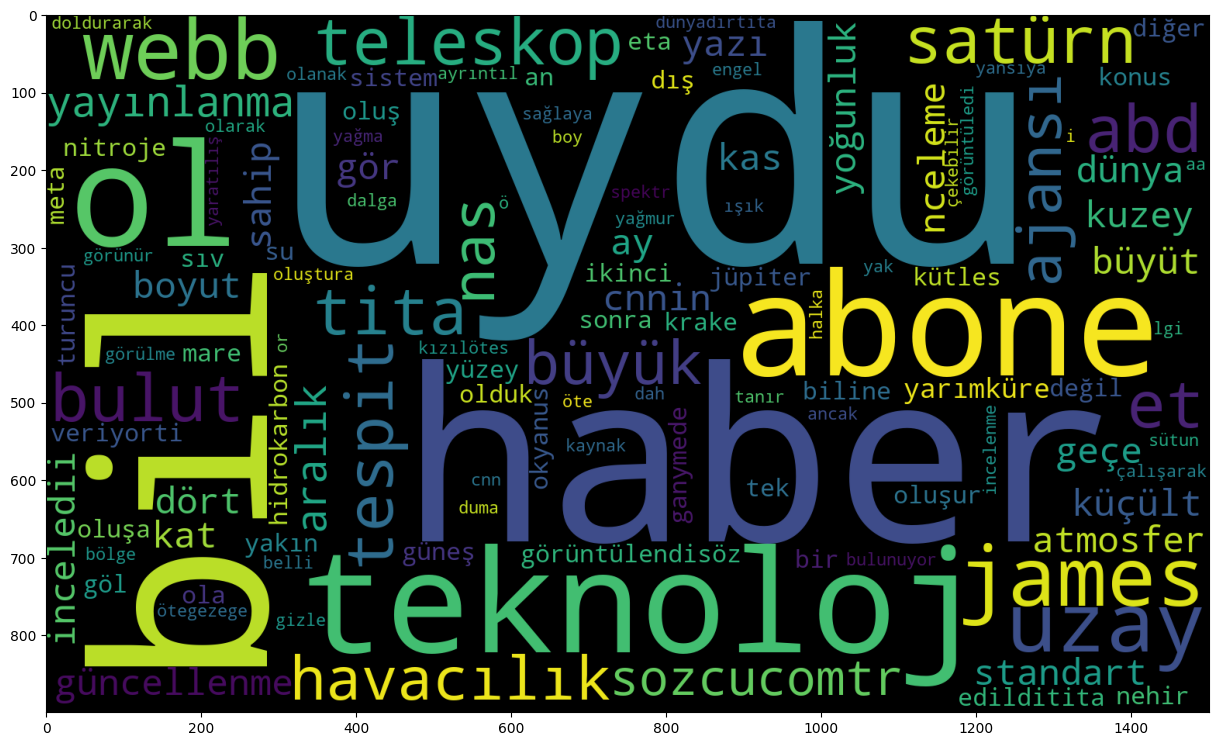

In [17]:
cloud(article1)

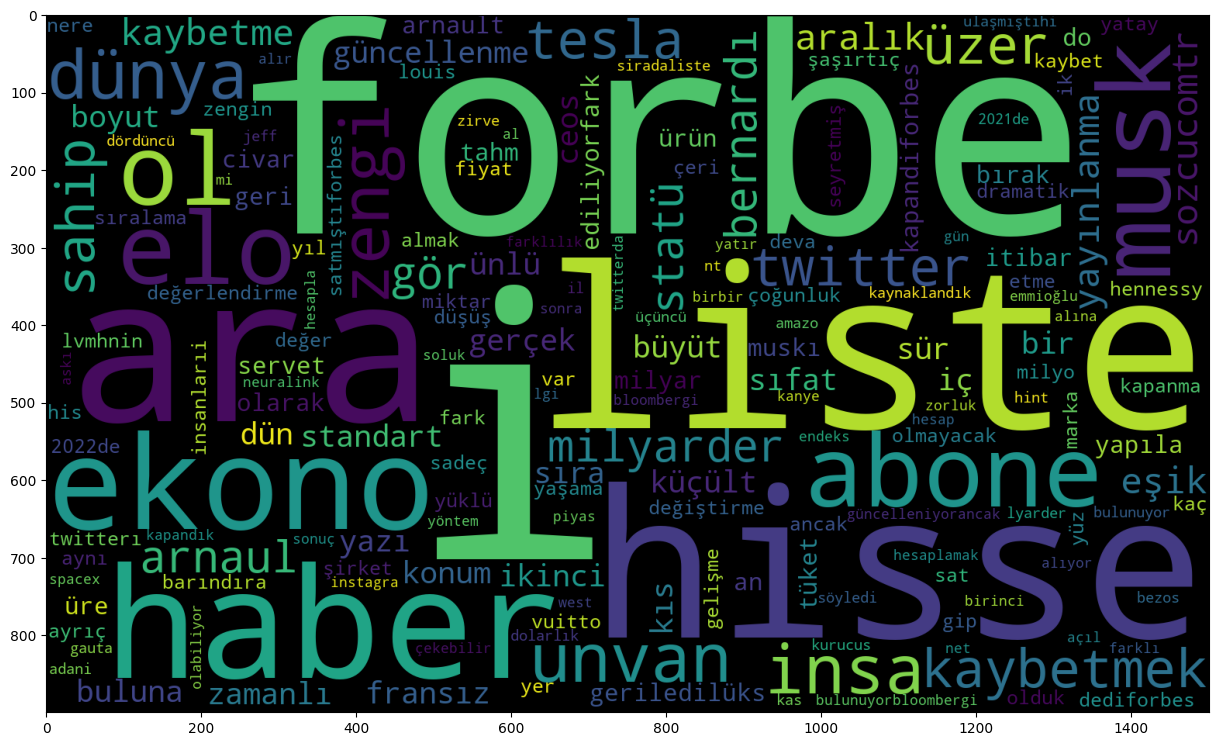

In [18]:
cloud(article2)

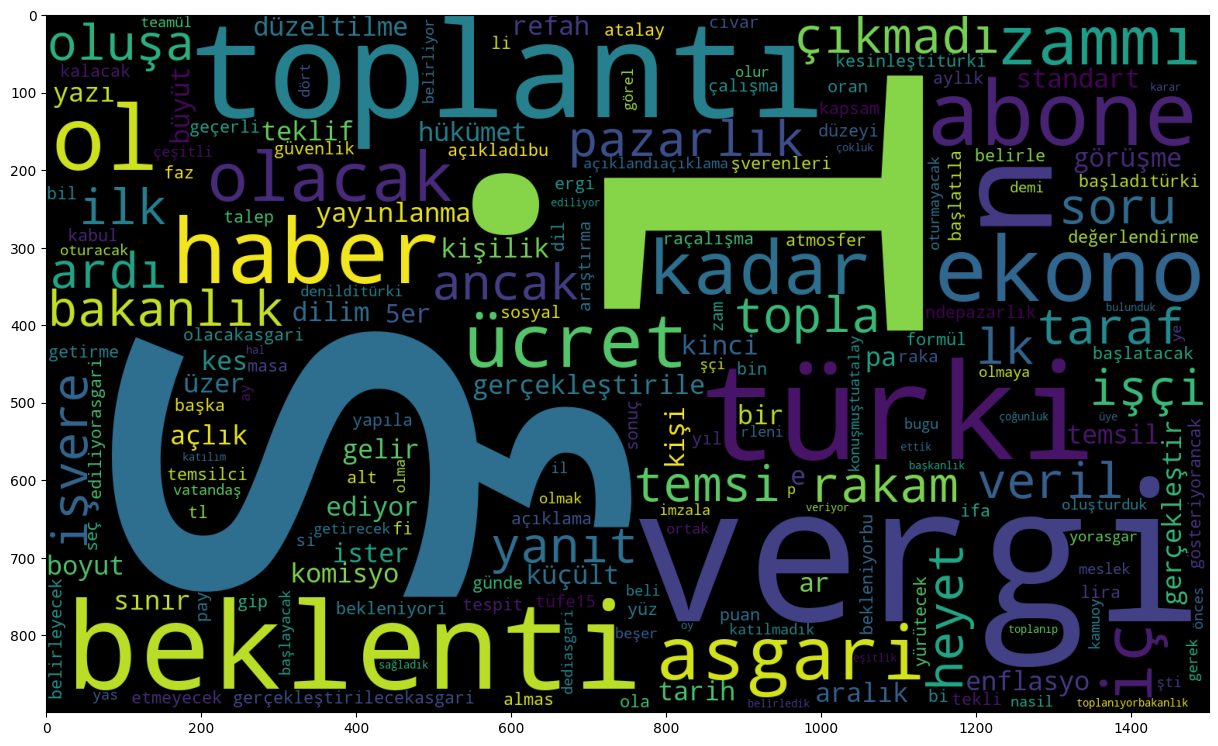

In [19]:
cloud(article3)

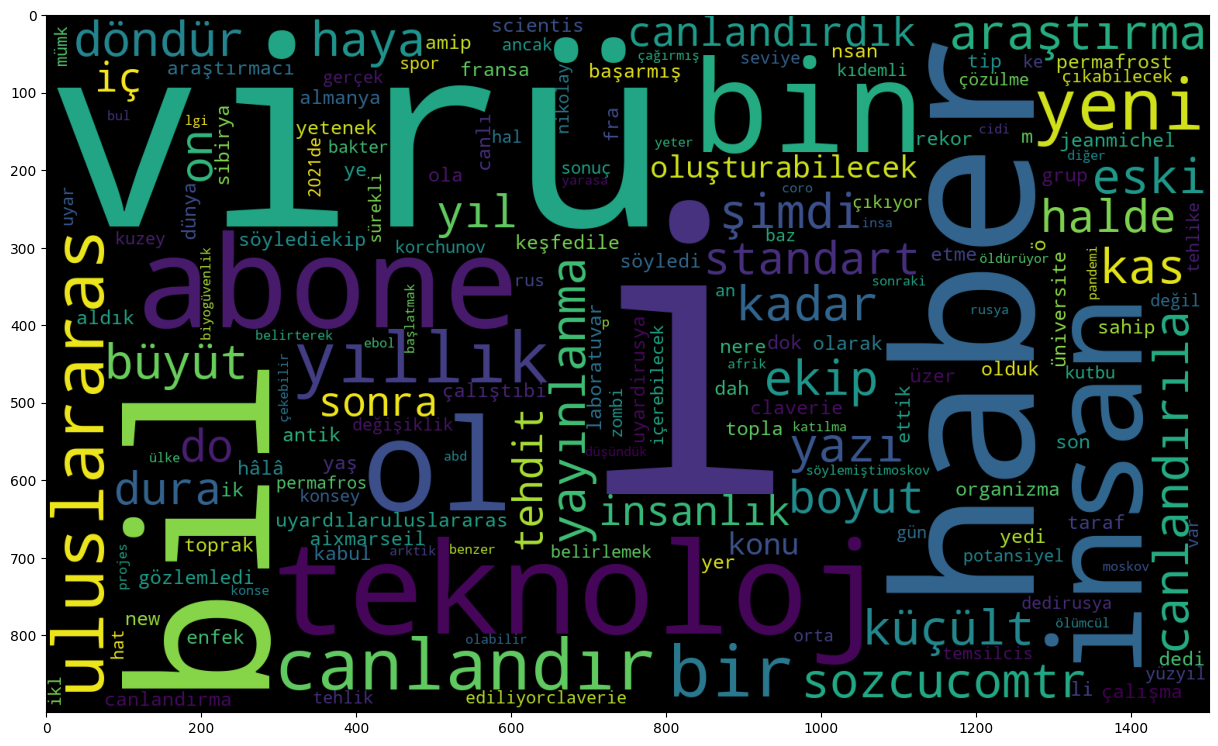

In [20]:
cloud(article4)

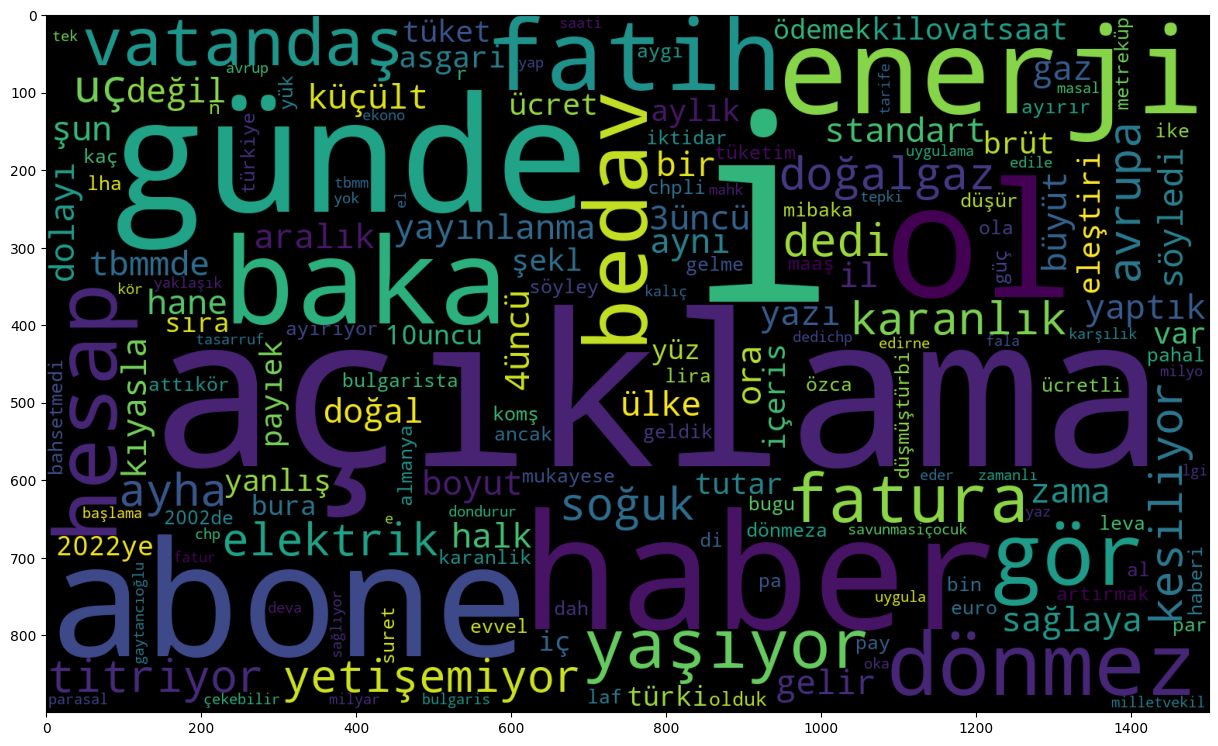

In [97]:
cloud(article5)

# Question 2

### Twitter has not yet approved my account for tweepy use.

# Question 3

In [42]:
df = pd.read_csv('scrubbed.csv')
df

C:\Users\90546\AppData\Local\Temp\ipykernel_452520\1983188404.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [43]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [44]:
df.rename(columns = {'longitude ': 'longitude'}, inplace = True)

In [45]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [46]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [47]:
df.iloc[43782][9]

'33q.200088'

In [48]:
df.latitude = pd.to_numeric(df.latitude, errors = 'coerce' )
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

### While there is no null value in the latitude column, one null value appears in the latitude column after converting the data type of latitudes from object to float. After looking at which row the null value is in the latitude column converted to float data type, when I checked what the value of the null value was when the data type of the latitude column was an object, the value '33q.200088' appeared. I removed the row with this null value from the dataframe

In [49]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   1
longitude                  0
dtype: int64

In [50]:
df[df['latitude'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43782,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,NaN,-105.624152


In [51]:
df.drop(43782, inplace = True)

In [52]:
df[df['latitude'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude


In [53]:
df.describe()

,latitude,longitude
count,80331.000000,80331.000000
mean,38.124477,-86.772650
std,10.469636,39.697396
min,-82.862752,-176.658056
25%,34.134722,-112.073333
50%,39.411111,-87.903611
75%,42.788333,-78.755000
max,72.700000,178.441900


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80331 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80331 non-null  object 
 1   city                  80331 non-null  object 
 2   state                 74534 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78399 non-null  object 
 5   duration (seconds)    80331 non-null  object 
 6   duration (hours/min)  80331 non-null  object 
 7   comments              80316 non-null  object 
 8   date posted           80331 non-null  object 
 9   latitude              80331 non-null  float64
 10  longitude             80331 non-null  float64
dtypes: float64(2), object(9)
memory usage: 7.4+ MB


## Question 3.2

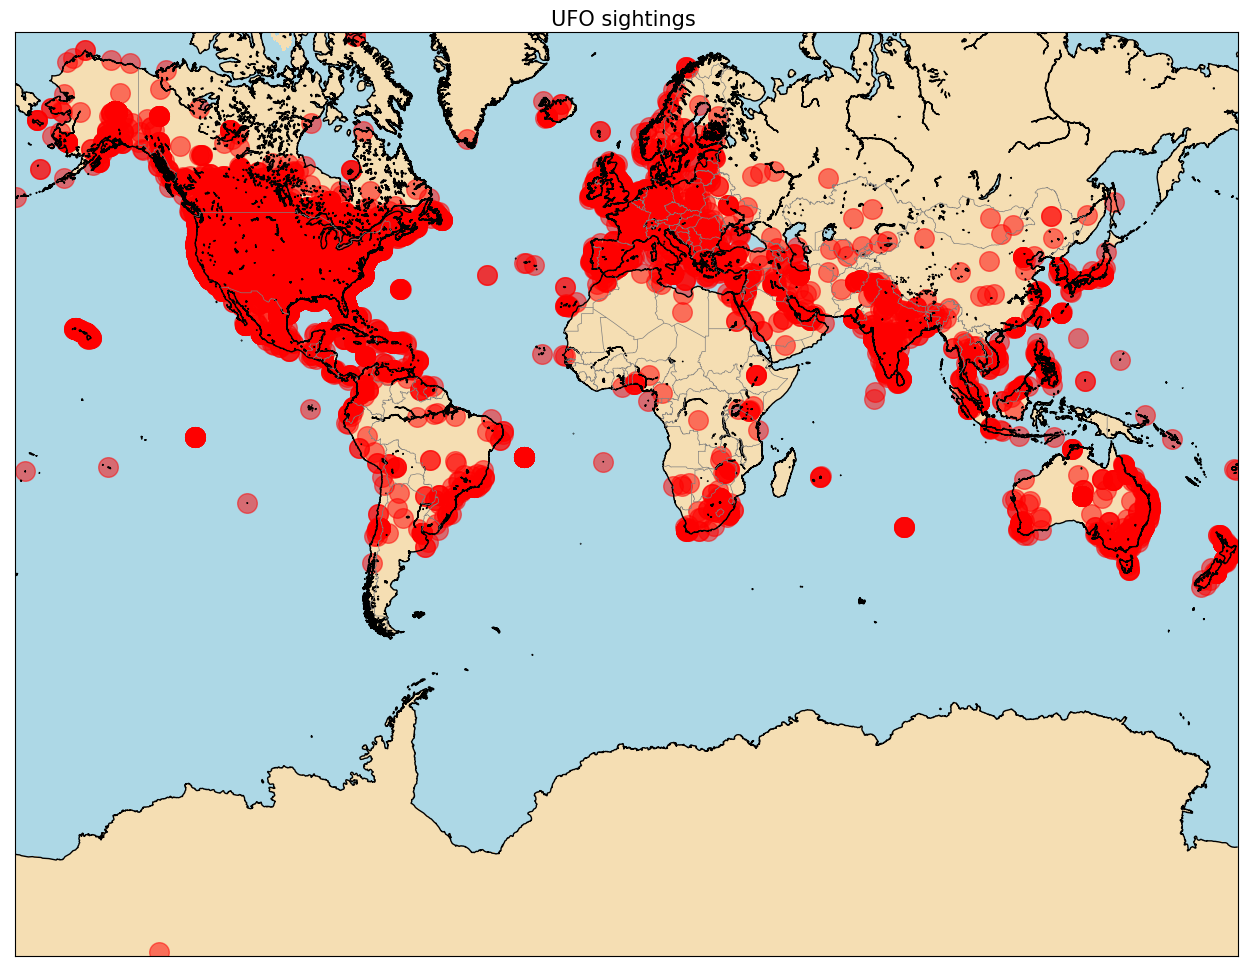

In [34]:
plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=-83,
           urcrnrlat=73,
           llcrnrlon=-177,
           urcrnrlon=179,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='wheat', ocean_color='lightblue')

xs,ys = m(df['longitude'], df['latitude'])
m.scatter(xs, ys, c='red', s=200, alpha=0.5)

plt.title("UFO sightings ", fontdict={"fontsize": 15}, pad=5);

## Question 3.3

In [55]:
null_shape = df[df['shape'].isnull()].index
null_shape = list(null_shape)
len(null_shape)

1932

In [56]:
df.drop(null_shape, inplace=True)

In [67]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors = 'coerce' )
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)      float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

In [58]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome', 'changed'], dtype=object)

In [82]:
df[['shape', 'duration (seconds)']]

,shape,duration (seconds)
0,cylinder,2700.0
1,light,7200.0
2,circle,20.0
3,circle,20.0
4,light,900.0
...,...,...
80327,light,600.0
80328,circle,1200.0
80329,other,1200.0
80330,circle,5.0


In [69]:
df.groupby('shape')['duration (seconds)'].describe()

,count,mean,std,min,25%,50%,75%,max
shape,,,,,,,,
changed,1.0,3600.000000,NaN,3600.000,3600.00,3600.0,3600.00,3600.0
changing,1962.0,2079.513405,7.978068e+03,1.000,120.00,420.0,1425.00,172800.0
chevron,952.0,460.317174,1.350015e+03,0.300,15.00,60.0,300.00,21600.0
cigar,2057.0,1917.106830,4.070627e+04,0.500,30.00,180.0,600.00,1814400.0
circle,7607.0,4768.092717,1.681856e+05,0.050,30.00,180.0,600.00,10526400.0
cone,316.0,82827.405063,1.420360e+06,1.000,50.00,300.0,900.00,25248000.0
crescent,2.0,18905.000000,2.672157e+04,10.000,9457.50,18905.0,28352.50,37800.0
cross,233.0,748.519313,1.465068e+03,1.000,60.00,240.0,720.00,10800.0
cylinder,1283.0,3426.512471,7.478695e+04,1.000,40.00,180.0,600.00,2631600.0


### The minimum, maximum, average and standard deviations of the UFOs appearing times in seconds according to their shapes are as above. It is clear that the standard deviations of the sighting duration of most UFO shapes are very large. Therefore, it is seen that there is no statistically verifiable relationship between the shape of the UFO and the  sighting duration . The distribution of the sightning duration is below.

ValueError: num must be 1 <= num <= 30, not 31

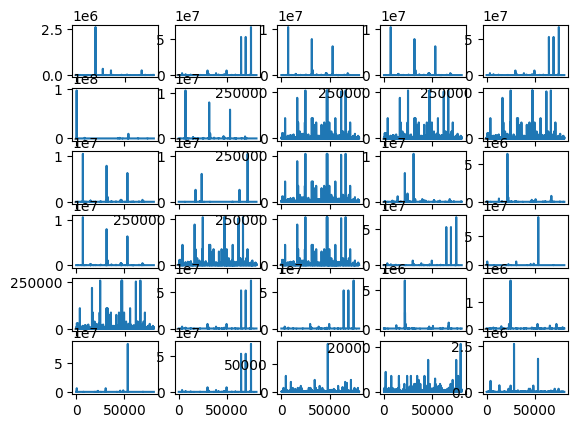

In [155]:
arr = list(df['shape'])
j = 1
for i in arr:
    plt.subplot(6, 5, j)
    plt.plot(df[df['shape'] == i]['duration (seconds)'])
    j += 1

# Question 4

In [86]:
population = pd.read_excel('https://data.tuik.gov.tr/Bulten/DownloadIstatistikselTablo?p=/vtxiTKFBPPQlHnyc/wI72tJn4gqwBgmygoKP3Q89zZWU8E6Hyfi03q5kxPWi8zq')

In [87]:
population.head(10)

,"Yıllara göre il nüfusları, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,"Population of provinces by years, 2000-2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,İl\nProvinces,Nüfus tahmini\nPopulation estimate(1) (2),NaN,NaN,NaN,NaN,NaN,NaN,Adrese Dayalı Nüfus Kayıt Sistemi \nAddress Ba...,NaN,...,NaN,NaN,NaN,Adrese Dayalı Nüfus Kayıt Sistemi \nAddress Ba...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007,2008.0,...,2012.0,2013.0,2014.0,2015,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
3,Toplam-Total,64729501,65603160.0,66401851.0,67187251.0,68010215.0,68860539.0,69729967.0,70586256,71517100.0,...,75627384.0,76667864.0,77695904.0,78741053,79814871.0,80810525.0,82003882.0,83154997.0,83614362.0,84680273.0
4,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319.0,...,2125635.0,2149260.0,2165595.0,2183167,2201670.0,2216475.0,2220125.0,2237940.0,2258718.0,2263373.0
5,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067.0,...,595261.0,597184.0,597835.0,602774,610484.0,615076.0,624513.0,626465.0,632459.0,632148.0
6,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365.0,...,703948.0,707123.0,706371.0,709015,714523.0,715693.0,725568.0,729483.0,736912.0,744179.0
7,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180.0,...,552404.0,551177.0,549435.0,547210,542255.0,536285.0,539657.0,536199.0,535435.0,524644.0
8,Amasya,333927,333768.0,333110.0,332271.0,331491.0,330739.0,329956.0,328674,323675.0,...,322283.0,321977.0,321913.0,322167,326351.0,329888.0,337508.0,337800.0,335494.0,335331.0
9,Ankara,3889199,3971642.0,4050309.0,4128889.0,4210596.0,4294678.0,4380736.0,4466756,4548939.0,...,4965542.0,5045083.0,5150072.0,5270575,5346518.0,5445026.0,5503985.0,5639076.0,5663322.0,5747325.0


In [88]:
population.tail(10)

,"Yıllara göre il nüfusları, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
83,Osmaniye,411163,417418.0,423214.0,428943.0,434930.0,441108.0,447428.0,452880,464704.0,...,492135.0,498981.0,506807.0,512873,522175.0,527724.0,534415.0,538759.0,548556.0,553012.0
84,Düzce,296712,300686.0,304316.0,307884.0,311623.0,315487.0,319438.0,323328,328611.0,...,346493.0,351509.0,355549.0,360388,370371.0,377610.0,387844.0,392166.0,395679.0,400976.0
85,"Kaynak: TÜİK nüfus tahminleri, 2000-2006, Adre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,"Source: TurkStat, Population Estimates, 2000-2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,"(1) 2000-2006 dönemi yıl sonu nüfusları, ADNKS...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,(1) End of the year populations for the 2000-2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,(2) Rakamlar yuvarlamadan dolayı toplamı verme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,(2) Total numbers may not give the exact total...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,(3) 2007-2021 dönemi için ADNKS sonuçlarıdır.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,(3) ABPRS results for the period 2007-2021.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
population.dropna(inplace = True)

In [90]:
population

,"Yıllara göre il nüfusları, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,Toplam-Total,64729501,65603160.0,66401851.0,67187251.0,68010215.0,68860539.0,69729967.0,70586256,71517100.0,...,75627384.0,76667864.0,77695904.0,78741053,79814871.0,80810525.0,82003882.0,83154997.0,83614362.0,84680273.0
4,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319.0,...,2125635.0,2149260.0,2165595.0,2183167,2201670.0,2216475.0,2220125.0,2237940.0,2258718.0,2263373.0
5,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067.0,...,595261.0,597184.0,597835.0,602774,610484.0,615076.0,624513.0,626465.0,632459.0,632148.0
6,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365.0,...,703948.0,707123.0,706371.0,709015,714523.0,715693.0,725568.0,729483.0,736912.0,744179.0
7,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180.0,...,552404.0,551177.0,549435.0,547210,542255.0,536285.0,539657.0,536199.0,535435.0,524644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Yalova,144923,150027.0,155041.0,160099.0,165333.0,170705.0,176207.0,181758,197412.0,...,211799.0,220122.0,226514.0,233009,241665.0,251203.0,262234.0,270976.0,276050.0,291001.0
81,Karabük,205172,207241.0,209056.0,210812.0,212667.0,214591.0,216557.0,218463,216248.0,...,225145.0,230251.0,231333.0,236978,242347.0,244453.0,248014.0,248458.0,243614.0,249287.0
82,Kilis,109698,111024.0,112219.0,113387.0,114615.0,115886.0,117185.0,118457,120991.0,...,124320.0,128586.0,128781.0,130655,130825.0,136319.0,142541.0,142490.0,142792.0,145826.0
83,Osmaniye,411163,417418.0,423214.0,428943.0,434930.0,441108.0,447428.0,452880,464704.0,...,492135.0,498981.0,506807.0,512873,522175.0,527724.0,534415.0,538759.0,548556.0,553012.0


In [112]:
pop_upd = population.iloc[1:85, :]
col_names = pop_upd.columns
new_col_names = ['İller']
for i in range(2000,2022):
    new_col_names.append(i)

col_names = pop_upd.columns
col_names

Index(['Yıllara göre il nüfusları, 2000-2021', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [113]:
pop_upd.columns = new_col_names
pop_upd.set_index('İller')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
İller,,,,,,,,,,,,,,,,,,,,,
Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319.0,2062226.0,...,2125635.0,2149260.0,2165595.0,2183167,2201670.0,2216475.0,2220125.0,2237940.0,2258718.0,2263373.0
Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067.0,588475.0,...,595261.0,597184.0,597835.0,602774,610484.0,615076.0,624513.0,626465.0,632459.0,632148.0
Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365.0,701326.0,...,703948.0,707123.0,706371.0,709015,714523.0,715693.0,725568.0,729483.0,736912.0,744179.0
Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180.0,537665.0,...,552404.0,551177.0,549435.0,547210,542255.0,536285.0,539657.0,536199.0,535435.0,524644.0
Amasya,333927,333768.0,333110.0,332271.0,331491.0,330739.0,329956.0,328674,323675.0,324268.0,...,322283.0,321977.0,321913.0,322167,326351.0,329888.0,337508.0,337800.0,335494.0,335331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yalova,144923,150027.0,155041.0,160099.0,165333.0,170705.0,176207.0,181758,197412.0,202531.0,...,211799.0,220122.0,226514.0,233009,241665.0,251203.0,262234.0,270976.0,276050.0,291001.0
Karabük,205172,207241.0,209056.0,210812.0,212667.0,214591.0,216557.0,218463,216248.0,218564.0,...,225145.0,230251.0,231333.0,236978,242347.0,244453.0,248014.0,248458.0,243614.0,249287.0
Kilis,109698,111024.0,112219.0,113387.0,114615.0,115886.0,117185.0,118457,120991.0,122104.0,...,124320.0,128586.0,128781.0,130655,130825.0,136319.0,142541.0,142490.0,142792.0,145826.0


### Question 4.2

In [116]:
crime = pd.read_excel('https://data.tuik.gov.tr/Bulten/DownloadIstatistikselTablo?p=MONYwMFRJEswcMmTlvhzVzMoFOfrB2W1jgAlldWlYxvtRJUN1OTmbaPFJNrHhRDD')
crime            

,"İBBS 3. Düzeyde, suçun işlendiği il ve suç türüne göre ceza infaz kurumundan çıkan hükümlüler, 2011-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Convicts discharged from prison by province wh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Suç türü - Type of crime,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ateşli,İcra İflas,Askeri,NaN,NaN,NaN,Ailenin,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,silahlar,Kanunu'na,Ceza,NaN,NaN,Görevi,korunması,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,NaN,NaN,Kadın - Female,101,-,7,2,2,2,8,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3345,Kaynaklar: Ceza İnfaz Kurumu İstatistikleri 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3346,Sources: Prison Statistics 2011-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3347,- Bilgi yoktur.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
first_column =crime.columns[0]
crime[first_column] 
yearss = []
for i in range(2011,2021):
    yearss.append(i)

new_first = []
for i in crime[first_column]:
    if i not in yearss:
        new_first.append(np.nan)
    else:
        new_first.append(int(i))

crime[first_column] = new_first
crime.dropna(how='all')        

,"İBBS 3. Düzeyde, suçun işlendiği il ve suç türüne göre ceza infaz kurumundan çıkan hükümlüler, 2011-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Suç türü - Type of crime,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ateşli,İcra İflas,Askeri,NaN,NaN,NaN,Ailenin,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,silahlar,Kanunu'na,Ceza,NaN,NaN,Görevi,korunması,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,NaN,Şırnak,Erkek - Male,102,6,8,-,-,1,11,...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,Kadın - Female,10,-,-,-,-,-,-,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,NaN,Siirt,Erkek - Male,87,3,17,2,1,1,21,...,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3343,NaN,NaN,Erkek - Male,3448,159,320,48,30,35,255,...,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
crime.drop(axis=0,index=1,inplace= True)
col_name_generate = crime.iloc[2:13,:].copy()
col_name_generate = col_name_generate.fillna('')
col_name_generate = col_name_generate.astype(str)
col_names = col_name_generate.apply(' '.join).tolist()
colmns = []
for i in col_names:
    colmns.append(i.strip())
colmns[0] = 'Yıl'
colmns[1] = 'İller'
colmns[2] = 'Cinsiyet'
crime_names = colmns[3:]
colmns

['Yıl',
 'İller',
 'Cinsiyet',
 'Toplam Total',
 'Öldürme Homicide',
 'Yaralama Assault',
 'Cinsel suçlar Sexual crimes',
 'Kişiyi  hürriye- tinden  yoksun kılma Kidnapping',
 'Hakaret Defamation',
 'Hırsızlık Theft',
 'Yağma Robbery',
 'Dolandırıcılık Swindling',
 'turucu veya uyarıcı madde imal ve ticareti Production  and commerce of drugs',
 'turucu veya uyarıcı  madde kullanma, satın alma Use and purchase of drugs',
 'Sahtecilik Forgery',
 'Kötü muamele Bad treatment',
 'Zimmet Embezzle- ment',
 'Rüşvet Bribery',
 'Kaçakçılık Smuggling',
 'Trafik suçları Traffic crimes',
 'Orman suçları Forestry crimes',
 'Ateşli silahlar ve bıçaklar ile ilgili suçlar Crimes related with firearms and knifes',
 "İcra İflas Kanunu'na muhalefet Opposition to the Bankruptcy and Enforcement Law",
 "Askeri Ceza Kanunu'na muhalefet Opposition to the Military Criminal Law",
 'Tehdit Threat',
 'Mala zarar verme Damage to property',
 'Görevi yaptır- mamak için direnme Prevention of performance',
 'Ailenin ko

In [119]:
crime_df=crime.iloc[12:3345,:].copy()
crime_df.dropna(how='all',inplace=True)
crime_df.columns = colmns
nan_made_zero=crime_df[crime_names].copy()
nan_made_zero.fillna(0,inplace = True)
crime_df[crime_names] =nan_made_zero
crime_df.fillna(method='ffill', inplace= True)
crime_df.drop(axis=0,index = 13,inplace=True)
crime_df.replace(['-'],0, inplace= True)
crime_df.columns

Index(['Yıl', 'İller', 'Cinsiyet', 'Toplam Total', 'Öldürme Homicide',
       'Yaralama Assault', 'Cinsel suçlar Sexual crimes',
       'Kişiyi  hürriye- tinden  yoksun kılma Kidnapping',
       'Hakaret Defamation', 'Hırsızlık Theft', 'Yağma Robbery',
       'Dolandırıcılık Swindling',
       'turucu veya uyarıcı madde imal ve ticareti Production  and commerce of drugs',
       'turucu veya uyarıcı  madde kullanma, satın alma Use and purchase of drugs',
       'Sahtecilik Forgery', 'Kötü muamele Bad treatment',
       'Zimmet Embezzle- ment', 'Rüşvet Bribery', 'Kaçakçılık Smuggling',
       'Trafik suçları Traffic crimes', 'Orman suçları Forestry crimes',
       'Ateşli silahlar ve bıçaklar ile ilgili suçlar Crimes related with firearms and knifes',
       'İcra İflas Kanunu'na muhalefet Opposition to the Bankruptcy and Enforcement Law',
       'Askeri Ceza Kanunu'na muhalefet Opposition to the Military Criminal Law',
       'Tehdit Threat', 'Mala zarar verme Damage to property',
    

In [120]:
for i in crime_names:
    crime_df[i]=pd.to_numeric(crime_df[i],errors = 'coerce')

crime_df.columns

Index(['Yıl', 'İller', 'Cinsiyet', 'Toplam Total', 'Öldürme Homicide',
       'Yaralama Assault', 'Cinsel suçlar Sexual crimes',
       'Kişiyi  hürriye- tinden  yoksun kılma Kidnapping',
       'Hakaret Defamation', 'Hırsızlık Theft', 'Yağma Robbery',
       'Dolandırıcılık Swindling',
       'turucu veya uyarıcı madde imal ve ticareti Production  and commerce of drugs',
       'turucu veya uyarıcı  madde kullanma, satın alma Use and purchase of drugs',
       'Sahtecilik Forgery', 'Kötü muamele Bad treatment',
       'Zimmet Embezzle- ment', 'Rüşvet Bribery', 'Kaçakçılık Smuggling',
       'Trafik suçları Traffic crimes', 'Orman suçları Forestry crimes',
       'Ateşli silahlar ve bıçaklar ile ilgili suçlar Crimes related with firearms and knifes',
       'İcra İflas Kanunu'na muhalefet Opposition to the Bankruptcy and Enforcement Law',
       'Askeri Ceza Kanunu'na muhalefet Opposition to the Military Criminal Law',
       'Tehdit Threat', 'Mala zarar verme Damage to property',
    

In [121]:
agg_func = {'Cinsiyet' : 'first'}
for i in crime_names:
    agg_func[i] = 'sum'
agg_func

{'Cinsiyet': 'first',
 'Toplam Total': 'sum',
 'Öldürme Homicide': 'sum',
 'Yaralama Assault': 'sum',
 'Cinsel suçlar Sexual crimes': 'sum',
 'Kişiyi  hürriye- tinden  yoksun kılma Kidnapping': 'sum',
 'Hakaret Defamation': 'sum',
 'Hırsızlık Theft': 'sum',
 'Yağma Robbery': 'sum',
 'Dolandırıcılık Swindling': 'sum',
 'turucu veya uyarıcı madde imal ve ticareti Production  and commerce of drugs': 'sum',
 'turucu veya uyarıcı  madde kullanma, satın alma Use and purchase of drugs': 'sum',
 'Sahtecilik Forgery': 'sum',
 'Kötü muamele Bad treatment': 'sum',
 'Zimmet Embezzle- ment': 'sum',
 'Rüşvet Bribery': 'sum',
 'Kaçakçılık Smuggling': 'sum',
 'Trafik suçları Traffic crimes': 'sum',
 'Orman suçları Forestry crimes': 'sum',
 'Ateşli silahlar ve bıçaklar ile ilgili suçlar Crimes related with firearms and knifes': 'sum',
 "İcra İflas Kanunu'na muhalefet Opposition to the Bankruptcy and Enforcement Law": 'sum',
 "Askeri Ceza Kanunu'na muhalefet Opposition to the Military Criminal Law": 'su

In [122]:
crime_df = crime_df.groupby(['Yıl','İller']).aggregate(agg_func)
crime_vf= crime_df.drop(columns='Cinsiyet')
crime_vf

Toplam Total  Öldürme Homicide  Yaralama Assault  \
Yıl    İller                                                                
2011.0 Adana                   2295.0              86.0             217.0   
       Adıyaman                 183.0               5.0              14.0   
       Afyonkarahisar          1078.0              25.0              77.0   
       Aksaray                  314.0               9.0              27.0   
       Amasya                   405.0               7.0              26.0   
...                               ...               ...               ...   
2020.0 Çorum                   2005.0              47.0             407.0   
       İstanbul               58496.0             959.0            7258.0   
       İzmir                  28873.0             361.0            3697.0   
       Şanlıurfa               5813.0              93.0             738.0   
       Şırnak                  1232.0              15.0              86.0   

                         Cinsel suçlar Sexual crimes  \
Yıl    İller                                           
2011.0 Adana                                    14.0   
       Adıyaman                                  0.0   
       Afyonkarahisar                            7.0   
       Aksaray                                   5.0   
       Amasya                                    1.0   
...                                              ...   
2020.0 Çorum                                    27.0   
       İstanbul                                762.0   
       İzmir                                   331.0   
       Şanlıurfa                                28.0   
       Şırnak                                    4.0   

                         Kişiyi  hürriye- tinden  yoksun kılma Kidnapping  \
Yıl    İller                                                                
2011.0 Adana                                                         17.0   
       Adıyaman                                                       0.0   
       Afyonkarahisar                                                 8.0   
       Aksaray                                                        3.0   
       Amasya                                                         0.0   
...                                                                   ...   
2020.0 Çorum                                                         43.0   
       İstanbul                                                    1033.0   
       İzmir                                                        318.0   
       Şanlıurfa                                                    112.0   
       Şırnak                                                        11.0   

                         Hakaret Defamation  Hırsızlık Theft  Yağma Robbery  \
Yıl    İller                                                                  
2011.0 Adana                           19.0            167.0           52.0   
       Adıyaman                         1.0             23.0            1.0   
       Afyonkarahisar                  10.0             39.0           14.0   
       Aksaray                          2.0             12.0            2.0   
       Amasya                          12.0             15.0            1.0   
...                                     ...              ...            ...   
2020.0 Çorum                           31.0            349.0           59.0   
       İstanbul                       737.0          12951.0         3592.0   
       İzmir                          598.0           5643.0         1288.0   
       Şanlıurfa                       50.0           1769.0          183.0   
       Şırnak                          11.0            201.0           13.0   

                         Dolandırıcılık Swindling  \
Yıl    İller                                        
2011.0 Adana                                229.0   
       Adıyaman                              24.0   
       Afyonkarahisar                        56.0   

## Question 4.3

In [109]:
url = 'https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/turkey-shapefile/at_download/file'
border = geopandas.read_file(url)

In [135]:
border.geometry

0      POLYGON ((5600000.000 1900000.000, 5600000.000...
1      POLYGON ((5600000.000 2000000.000, 5600000.000...
2      POLYGON ((5600000.000 2100000.000, 5600000.000...
3      POLYGON ((5600000.000 2200000.000, 5600000.000...
4      POLYGON ((5700000.000 1800000.000, 5700000.000...
                             ...                        
137    POLYGON ((7200000.000 2300000.000, 7200000.000...
138    POLYGON ((7200000.000 2400000.000, 7200000.000...
139    POLYGON ((7200000.000 2500000.000, 7200000.000...
140    POLYGON ((7300000.000 2200000.000, 7300000.000...
141    POLYGON ((7300000.000 2300000.000, 7300000.000...
Name: geometry, Length: 142, dtype: geometry

In [111]:
border.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CELLCODE   142 non-null    object  
 1   EOFORIGIN  142 non-null    int64   
 2   NOFORIGIN  142 non-null    int64   
 3   geometry   142 non-null    geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 4.6+ KB


In [112]:
border.describe()

,EOFORIGIN,NOFORIGIN
count,1.420000e+02,1.420000e+02
mean,6.383099e+06,2.116197e+06
std,4.371039e+05,2.933391e+05
min,5.600000e+06,1.400000e+06
25%,6.000000e+06,1.900000e+06
50%,6.350000e+06,2.100000e+06
75%,6.700000e+06,2.300000e+06
max,7.300000e+06,2.600000e+06
